#Data Science Lifecycle


---
##Case Study: Loan Status



**Objective:**
We will explore a dataset of Loan data with the below info. We will try later to predict the status of loan for individuals based the following information.</font>

## DataSet Description

- **Loan_ID:** data set unique ID <br>
- **Gender:** individual gender<br>
- **Married:** individual marital status<br>
- **Dependents:** number of dependents<br>
- **Education:** individual education status<br>
- **Self_Employed:** individual employment status<br>
- **ApplicantIncome:** individual income<br>
- **CoapplicantIncome:** individual Coapplicant income<br>
- **LoanAmount:** Loan amount in thousands<br>
- **Loan_Amount_Term:** term of loan in months<br>
- **Credit_History:** credit history meets guidelines<br>
- **Property_Area:** Urban/ Semi Urban/ Rural<br>
- **Loan_Status:** loan approved (Y/N)<br>

# 1. Import necessary python modules (libraries)
<br>
We will need the following libraries:

- Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
- Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
- Matplotlib & seaborn — plotting & visualization.
- scikit-learn — a tool for data mining and machine learning models. We will need from it the following functions: LabelEncoder, train_test_split, LogisticRegression, and accuracy_score

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 2. Read & visualize data
To load the data to our code, we use pandas module, more specifically, the read_csv function.

Then, we combine the two dataset in order to apply the same preprocessing steps in both dataframes.

In [ ]:
train_data= pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

data = pd.concat([train_data,test_data])
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 3. Exploratory Data Analysis


We start by getting the number of rows and the number of columns that we have in the dataset

In [ ]:
print(data.shape)

rows = data.shape[0]
columns = data.shape[1]

print("Number of rows : ",rows)
print("Number of columns : ",columns)

(614, 13)
Number of rows :  614
Number of columns :  13


##### We used the function info(), to check:

- data types (int, float, or object (e.g., string))
- missing values
- memory usage
- number of rows and columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 100
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


The total number of values is 614 rows, so there's missing values in the following features: Gender (601, 13 missing value), Married (611, 3 missing value), Dependents (599, 15 missing value), Self_Employed (582, 32 missing value), LoanAmount (592, 22 missing value), Loan_Amount_Term (600, 14 Missing value), Credit_History (564, 50 missing value)



##### We used the function describe(), to check the following  values for each numerical feature (column)
- mean
- standard deviation
- maximum
- minimum


In [ ]:
data_numeric = data.select_dtypes(include=['number'])
data_numeric.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
print(data['Credit_History'].unique())

[ 1.  0. nan]


In [ ]:
print(data['Loan_Amount_Term'].unique())

[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]


##### We used the function describe(include='o'), to check the following  values for each categorical feature:
* count
* unique
* top
* freq


In [ ]:
data_categorical = data.select_dtypes(include=['object'])
data_categorical.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


The Gender variable in the dataset has a total of 601 non-null values (counting the values), with 13 missing entries. It is a binary categorical variable with two unique values representing Male and Female.

The most frequent category (Top) is Male, which appears 489 times (frequency) among the 601 non-missing entries, indicating that Male is the predominant gender in the dataset.

We computed the frequency for each unique value in the categorical feature specified in the code cells below

In [ ]:
property_area_counts = data['Property_Area'].value_counts()
print(property_area_counts)

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


In [ ]:
dependents_counts = data['Dependents'].value_counts()
print(dependents_counts)

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


We created a new dataframe removeNA_df, where we removed the nulls existing in the original dataframe. This is only for being able to visualize distributions.

In [ ]:
removeNA_df = data.dropna()

<ipython-input-152-690b915e80a5>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(removeNA_df['LoanAmount'], kde=False)


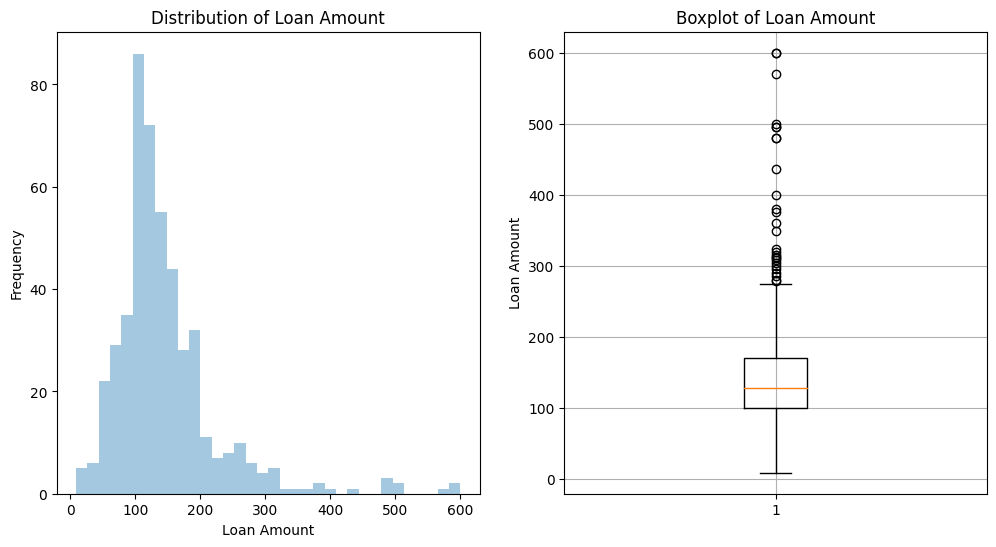

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

sns.distplot(removeNA_df['LoanAmount'], kde=False)

plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(removeNA_df['LoanAmount'])
plt.title('Boxplot of Loan Amount')
plt.ylabel('Loan Amount')
plt.grid(True)

plt.show()

Based on the boxplot, there appear to be outliers present in the data. The outliers are represented by the individual points that lie outside the whiskers of the boxplot. These outliers might be unusually high or low loan amounts compared to the majority of the data.

The histogram confirms that the data is right-skewed.The tail on the right side of the histogram is longer than the tail on the left side. This indicates that there are more data points in the higher loan amount ranges compared to the lower ones, which is a characteristic of right-skewed distributions.


<ipython-input-153-8a4bce10aee9>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(removeNA_df['ApplicantIncome'], kde=False)


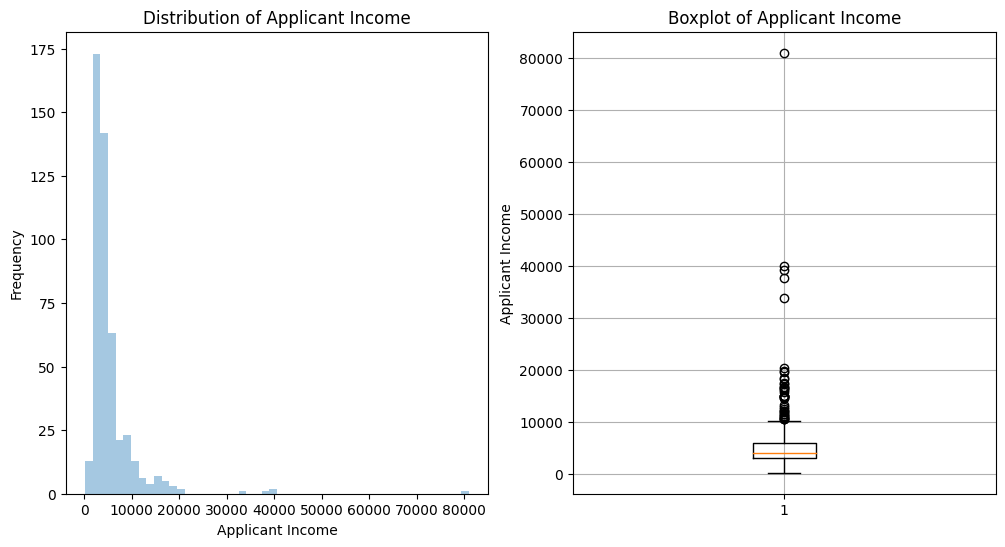

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

sns.distplot(removeNA_df['ApplicantIncome'], kde=False)
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(removeNA_df['ApplicantIncome'])
plt.title('Boxplot of Applicant Income')
plt.ylabel('Applicant Income')
plt.grid(True)

plt.show()

The boxplot shows several points that lie outside the whiskers, indicating that these data points (representing applicant incomes) are significantly higher or lower than the majority of the data. These points are considered outliers.

The histogram indicates that the data is right-skewed.The tail on the right side of the histogram is longer than the tail on the left side. This suggests that there are more data points (representing applicant incomes) in the higher income ranges compared to the lower ones, which is a characteristic of right-skewed distributions.

<ipython-input-154-e51804ffb71b>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(removeNA_df['CoapplicantIncome'], kde=False)  # Histogram without KDE


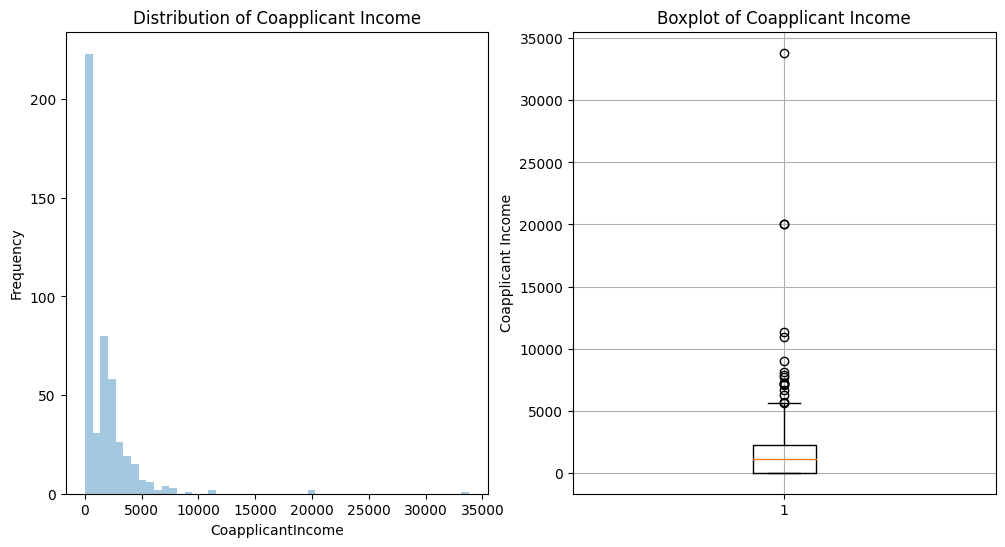

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.distplot(removeNA_df['CoapplicantIncome'], kde=False)
plt.title('Distribution of Coapplicant Income')
plt.xlabel('CoapplicantIncome')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(removeNA_df['CoapplicantIncome'])
plt.title('Boxplot of Coapplicant Income')
plt.ylabel('Coapplicant Income')
plt.grid(True)

plt.show()

The boxplot shows several points that lie outside the whiskers, indicating that these data points (representing coapplicant incomes) are significantly higher or lower than the majority of the data. These points are considered outliers.

The histogram indicates that the data is right-skewed.The tail on the right side of the histogram is longer than the tail on the left side. This suggests that there are more data points (representing coapplicant incomes) in the higher income ranges compared to the lower ones, which is a characteristic of right-skewed distributions.

<ipython-input-155-756de6993238>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(removeNA_df['Loan_Amount_Term'], kde=False)


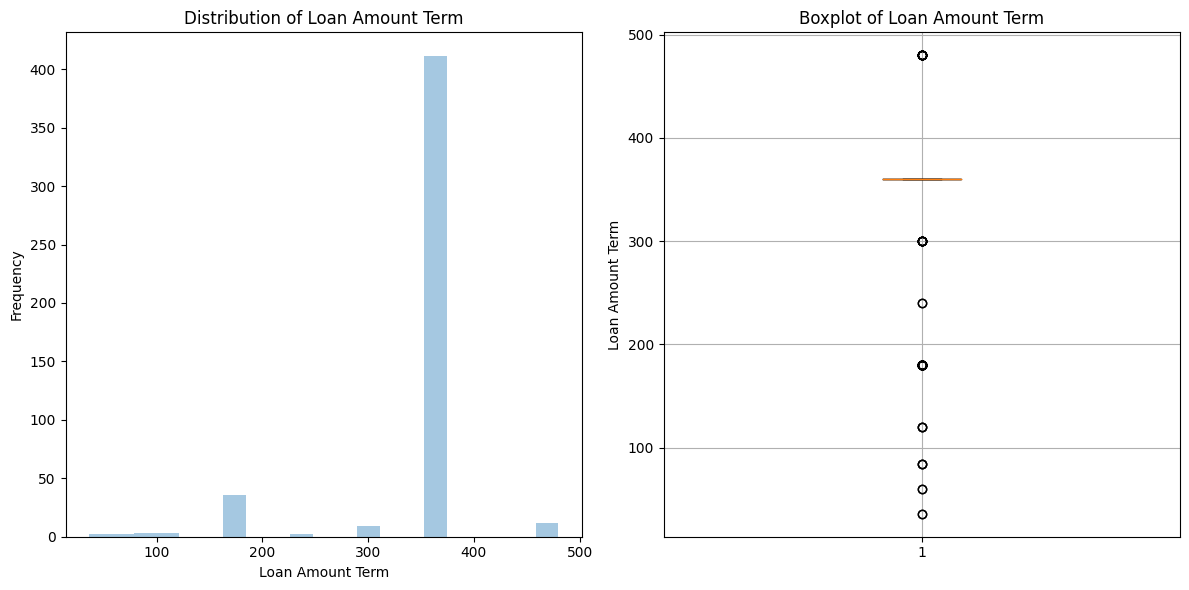

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.distplot(removeNA_df['Loan_Amount_Term'], kde=False)
plt.title('Distribution of Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(removeNA_df['Loan_Amount_Term'])
plt.title('Boxplot of Loan Amount Term')
plt.ylabel('Loan Amount Term')
plt.grid(True)
plt.tight_layout()

plt.show()

There are several data points that lie outside the whiskers of the boxplot, particularly on the higher end. These points represent loan terms that are significantly longer than the majority of the data.

</br>The data seems to be skewed to the right, as the median (represented by the line inside the box) is closer to the left side, and there's a longer tail extending to the right. Where majority of the loan term is 360.

Loan_Amount_Term
360.0    411
180.0     36
480.0     12
300.0      9
120.0      3
84.0       3
60.0       2
240.0      2
36.0       2
Name: count, dtype: int64


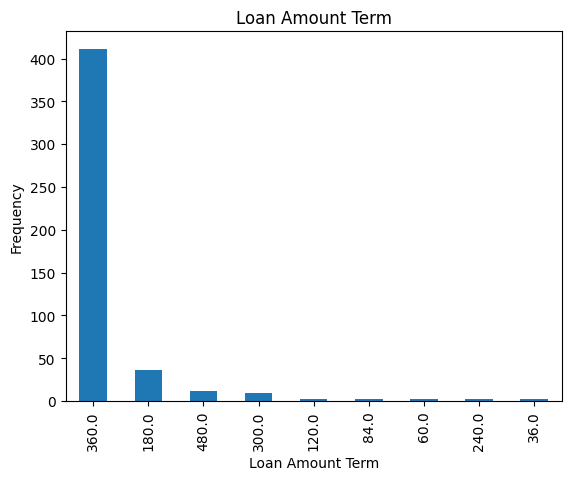

In [ ]:
loan_amount_term_counts = removeNA_df['Loan_Amount_Term'].value_counts()

print(loan_amount_term_counts)

loan_amount_term_counts.plot.bar(title='Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Frequency')
plt.show()

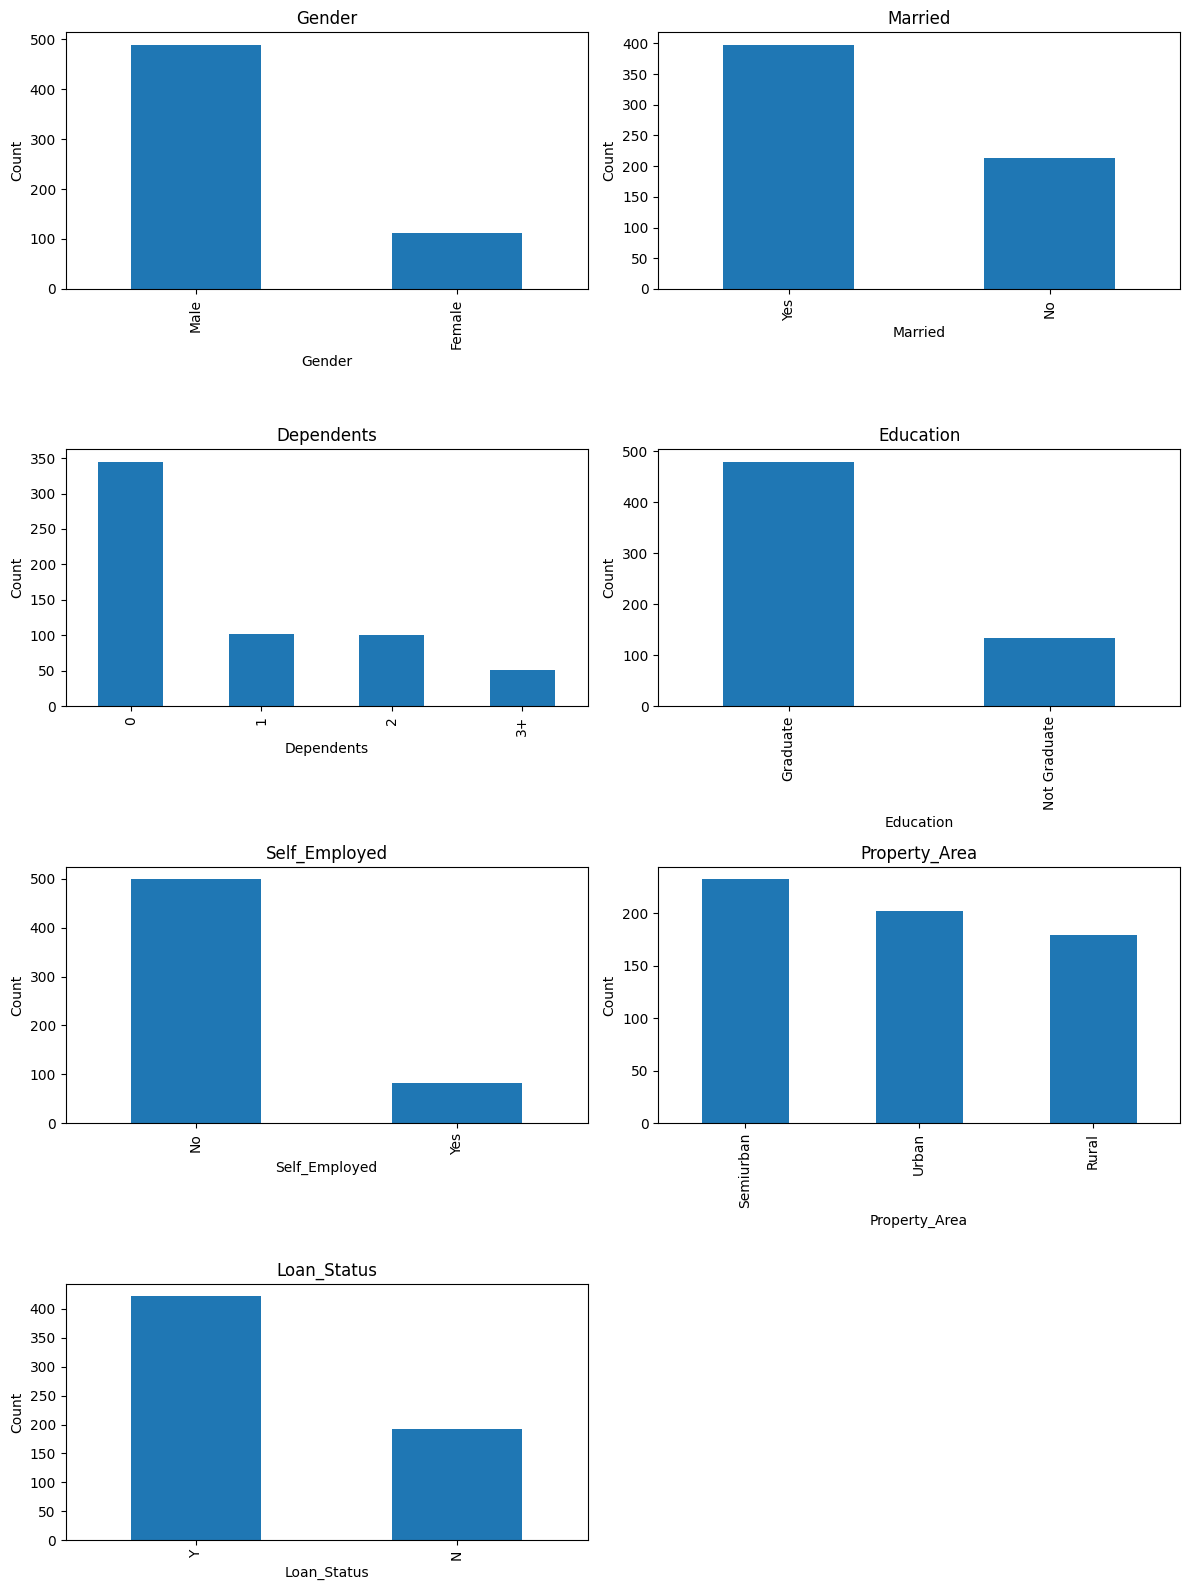

In [ ]:
plt.figure(1, figsize=(12, 16))

data_categorical = data_categorical.drop('Loan_ID', axis=1)

for i, col in enumerate(data_categorical):
    plt.subplot(4, 2, i + 1)
    data[col].value_counts().plot.bar(title=col)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()

plt.show()

Perform CrossTabing between Gender and Loan_Status, and then plot the acceptance/rejection of loans for different Genders

Loan_Status         N         Y
Gender                         
Female       0.330357  0.669643
Male         0.306748  0.693252


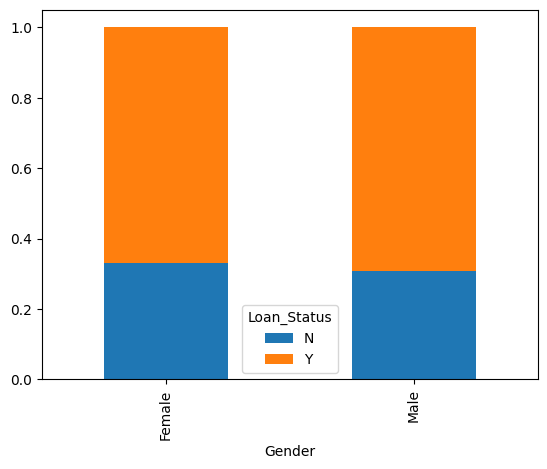

In [ ]:
gender_loan_status_ct = pd.crosstab(data['Gender'], data['Loan_Status'],normalize='index')
print(gender_loan_status_ct)

gender_loan_status_ct.plot(kind='bar', stacked=True)
plt.show()

The results suggest that both males and females have similar acceptance rates, with a slight variation:

- Females have a loan acceptance rate of around 66.96%.
- Males have a slightly higher loan acceptance rate of around 69.33%.

This difference is small, indicating that gender does not affect loan acceptance based on this dataset.

Do the same with Credit_history and Loan_Status

Loan_Status            N         Y
Credit_History                    
0.0             0.921348  0.078652
1.0             0.204211  0.795789


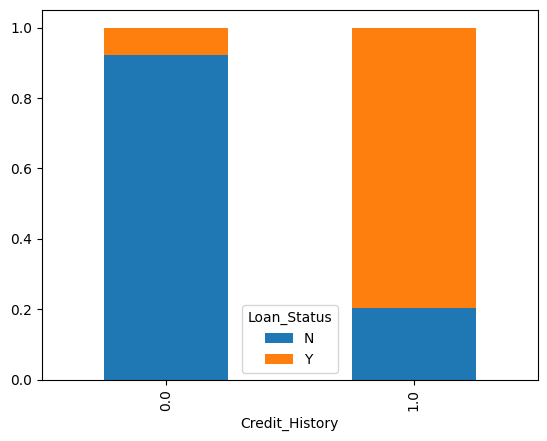

In [ ]:
Credit_history_loan_status_ct = pd.crosstab(data['Credit_History'], data['Loan_Status'],normalize='index')
print(Credit_history_loan_status_ct)

Credit_history_loan_status_ct.plot(kind='bar', stacked=True)
plt.show()

The credit history affect the acceptance of the loan:

- Applicants without a credit history (Credit_History = 0.0) have a high rejection rate (92.13%) and a very low acceptance rate (7.87%).
- Applicants with a credit history (Credit_History = 1.0) have a much higher acceptance rate (79.58%) and a lower rejection rate (20.42%).

This suggests that having a credit history significantly increases the chances of loan approval, while the lack of a credit history greatly reduces it.

Do the same with Dependents and Loan_Status

Loan_Status         N         Y
Dependents                     
0            0.310145  0.689855
1            0.352941  0.647059
2            0.247525  0.752475
3+           0.352941  0.647059


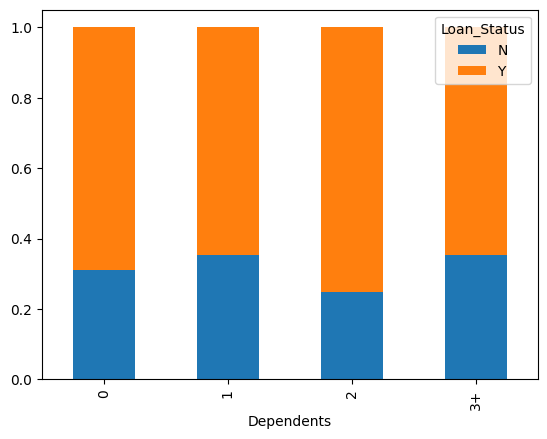

In [ ]:
dependents_loan_status_ct = pd.crosstab(data['Dependents'], data['Loan_Status'],normalize='index')
print(dependents_loan_status_ct)

dependents_loan_status_ct.plot(kind='bar', stacked=True)
plt.show()

The number of dependents appears to affect the acceptance of the loan. Here's the analysis:

- Dependents 2: Having 2 dependents seems to be associated with the highest loan approval rate (75.25%).
- Dependents 0, 1, and 3+: These groups have similar approval rates, around 64-69%.

The approval rate is generally higher for individuals with 2 or fewer dependents compared to those with 3 or more.

Do the same between Education and Loan_Status

Loan_Status          N         Y
Education                       
Graduate      0.291667  0.708333
Not Graduate  0.388060  0.611940


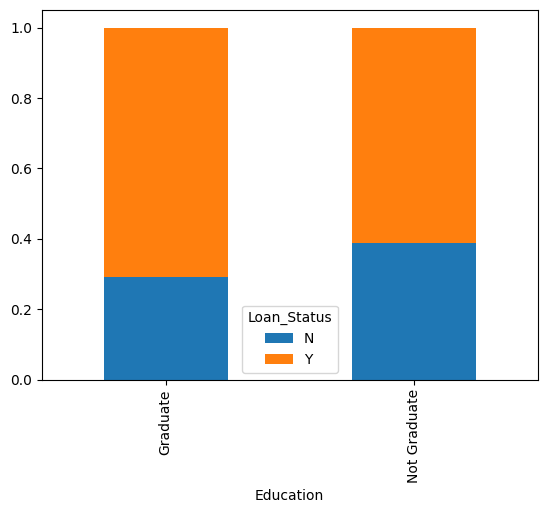

In [ ]:
education_loan_status_ct = pd.crosstab(data['Education'], data['Loan_Status'],normalize='index')
print(education_loan_status_ct)

education_loan_status_ct.plot(kind='bar', stacked=True)
plt.show()

Here's the analysis:

- Graduates have a higher loan acceptance rate of 70.83% and a lower rejection rate of 29.17%.
- Non-graduates have a lower acceptance rate of 61.19% and a higher rejection rate of 38.81%.

Graduates have a slightly higher loan acceptance rate compared to non-graduates. While the difference is not extremely large, it indicates that education level might have a small influence on loan approval.

Do the same between Married and Loan_Status

Loan_Status         N         Y
Married                        
No           0.370892  0.629108
Yes          0.283920  0.716080


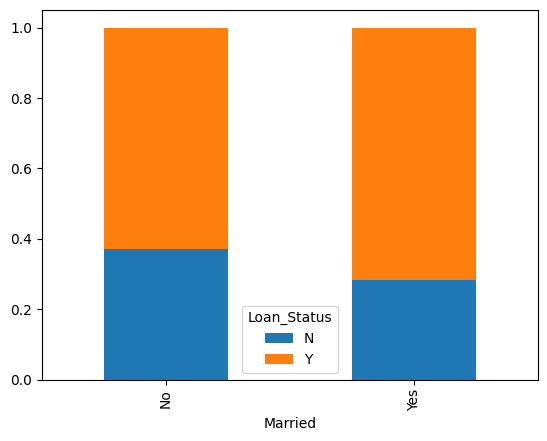

In [ ]:
Married_loan_status_ct = pd.crosstab(data['Married'], data['Loan_Status'],normalize='index')
print(Married_loan_status_ct)

Married_loan_status_ct.plot(kind='bar', stacked=True)
plt.show()

Interpretation:
- Married individuals have a higher loan acceptance rate of 71.61% and a lower rejection rate of 28.39%.
- Unmarried individuals (those who are not married) have a lower acceptance rate of 62.91% and a higher rejection rate of 37.09%.

Married individuals have a higher acceptance rate (approximately 72%) compared to unmarried individuals (approximately 63%). This suggests that marital status could be a factor in loan approval decisions.

Do the same between Property_Area and Loan_Status

Loan_Status           N         Y
Property_Area                    
Rural          0.385475  0.614525
Semiurban      0.231760  0.768240
Urban          0.341584  0.658416


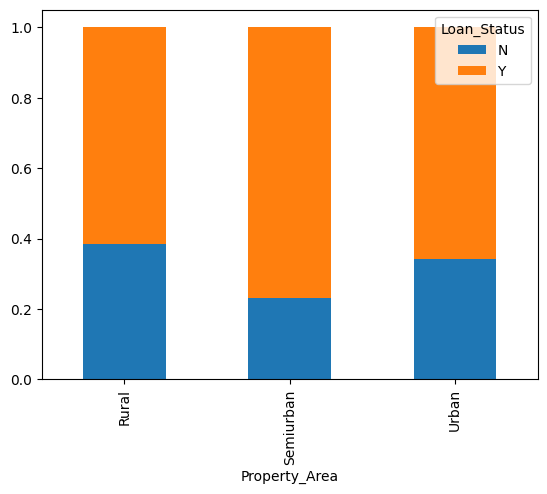

In [ ]:
Property_Area_loan_status_ct = pd.crosstab(data['Property_Area'], data['Loan_Status'],normalize='index')
print(Property_Area_loan_status_ct)

Property_Area_loan_status_ct.plot(kind='bar', stacked=True)
plt.show()

Interpretation:
- Rural Areas: Have the highest rejection rate at 38.55% and an acceptance rate of 61.45%.
- Semiurban Areas: Have the lowest rejection rate at 23.18% and the highest acceptance rate at 76.82%.
- Urban Areas: Have a moderate rejection rate of 34.16% and an acceptance rate of 65.84%.

Yes, it seems like the property area does affect the acceptance of the loan.loan acceptance rates are highest in semi-urban areas and lowest in rural areas.

Do the same between Self_Employed and Loan_Status

Loan_Status           N         Y
Self_Employed                    
No             0.314000  0.686000
Yes            0.317073  0.682927


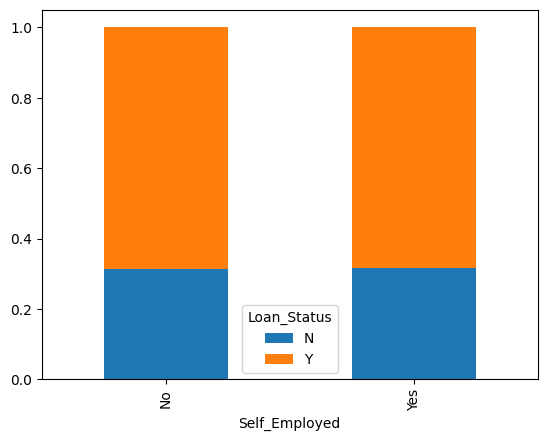

In [ ]:
Self_Employed_loan_status_ct = pd.crosstab(data['Self_Employed'], data['Loan_Status'],normalize='index')
print(Self_Employed_loan_status_ct)

Self_Employed_loan_status_ct.plot(kind='bar', stacked=True)
plt.show()

Interpretation:
- Self-Employed Individuals: Have a rejection rate of 31.71% and an acceptance rate of 68.29%.
- Non-Self-Employed Individuals: Have a rejection rate of 31.40% and an acceptance rate of 68.60%.

Self-employment status doesn't seem to significantly affect loan acceptance rates.

Plot a Scatter Plot between Loan_Status and:
* ApplicantIncome
* CoapplicantIncome
* LoanAmount
* LoanAmount_Term

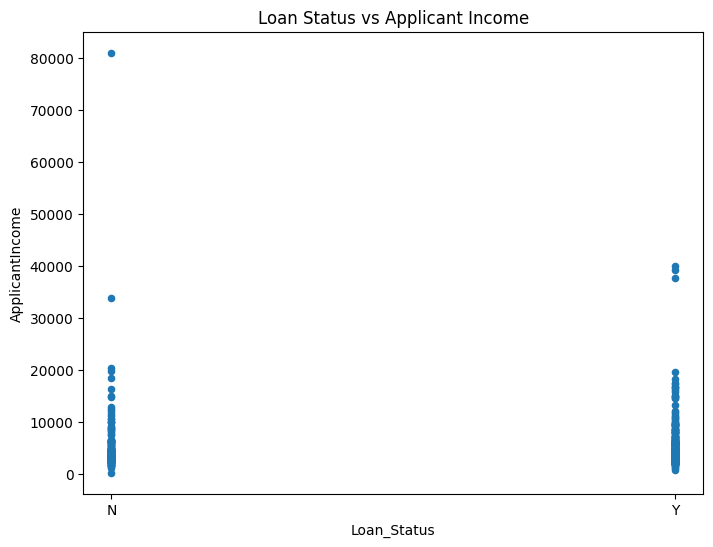

In [ ]:
removeNA_df.plot.scatter(x='Loan_Status', y='ApplicantIncome', title='Loan Status vs Applicant Income', figsize=(8,6))
plt.show()

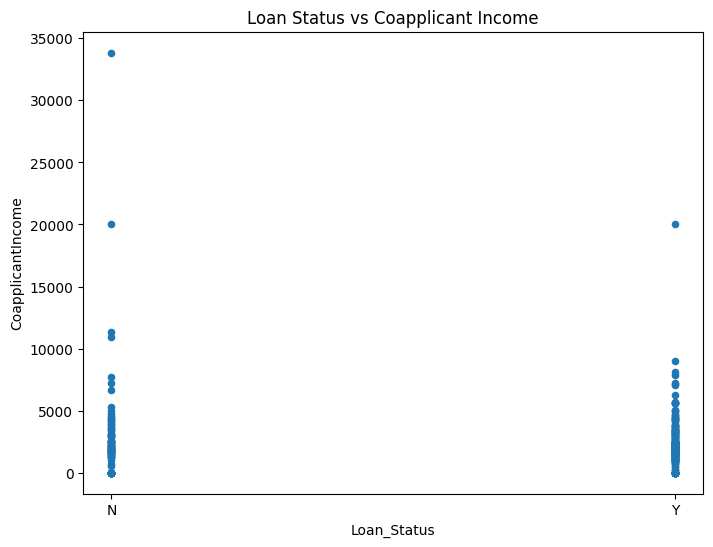

In [ ]:
removeNA_df.plot.scatter(x='Loan_Status', y='CoapplicantIncome', title='Loan Status vs Coapplicant Income', figsize=(8,6))
plt.show()

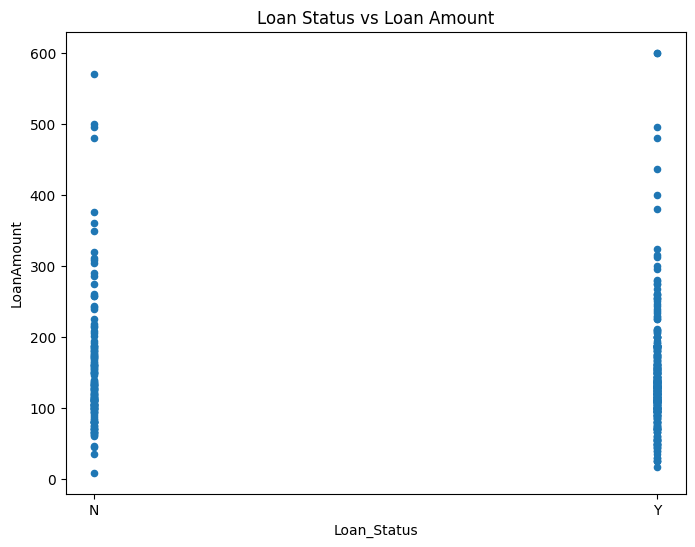

In [ ]:
removeNA_df.plot.scatter(x='Loan_Status', y='LoanAmount', title='Loan Status vs Loan Amount', figsize=(8,6))
plt.show()

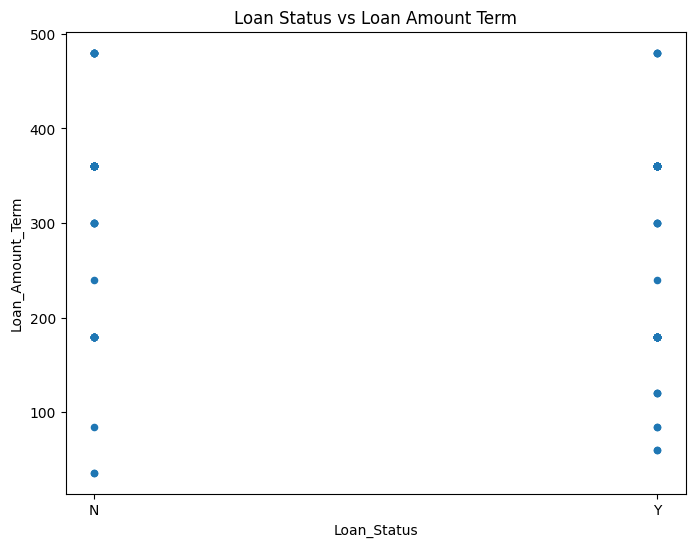

In [ ]:
removeNA_df.plot.scatter(x='Loan_Status', y='Loan_Amount_Term', title='Loan Status vs Loan Amount Term', figsize=(8,6))
plt.show()

Group your dataframe by Loan_Status on the median Value

In [ ]:
data_grouped = data.groupby('Loan_Status').median(numeric_only=True)
print(data_grouped)

             ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_Status                                                                     
N                     3833.5              268.0       129.0             360.0   
Y                     3812.5             1239.5       126.0             360.0   

             Credit_History  
Loan_Status                  
N                       1.0  
Y                       1.0  


Coapplicant income emerges as the most significant differentiator: applicants with higher coapplicant income are more likely to have their loans approved. In contrast, factors such as applicant income, loan amount, and loan term exhibit only minor differences between the groups. While most applicants possess a good credit history, it remains a crucial factor in the loan approval process.

# 4. Preprocessing
"Garbage in, garbage out".
<br>
<br>
Data should be preprocessed and cleaned to get rid of noisy data. Preprocessing includes:

- remove unsued column(s)
- remove grabage data
- convert continous data into categorical
- treat missing data
- encode categorical data
- normalization: standarize data ranges for all features (e.g., between 0 and 1)

## Remove unused columns

We removed the features that do not contribute to the prediction of the loan status

In [ ]:
data.drop(['Loan_ID','Gender','ApplicantIncome','LoanAmount','Loan_Amount_Term','Self_Employed'], axis=1, inplace=True)

## Remove grabage data

In [ ]:
data['Dependents'] = data['Dependents'].replace('3+', 3)

##Convert continuous data into categorical

Search for the feature that is contionuous but should be categorical and convert it

In [ ]:
data['Credit_History'] = data['Credit_History'].astype('O')

## Treat missing data
- fill missing categorical data & discrete data with mode
- fill missing continuous data with mean


In [ ]:
data.info()

data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 100
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            611 non-null    object 
 1   Dependents         599 non-null    object 
 2   Education          614 non-null    object 
 3   CoapplicantIncome  614 non-null    float64
 4   Credit_History     564 non-null    object 
 5   Property_Area      614 non-null    object 
 6   Loan_Status        614 non-null    object 
dtypes: float64(1), object(6)
memory usage: 38.4+ KB


<ipython-input-173-f963b73f072a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Married'].fillna(data['Married'].mode()[0], inplace=True)
<ipython-input-173-f963b73f072a>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

## Check if any null value exist

In [ ]:
data.isnull().sum()

,0
Married,0
Dependents,0
Education,0
CoapplicantIncome,0
Credit_History,0
Property_Area,0
Loan_Status,0


## Encode categorical data

Go over your categorical features and encode them (change their values to be numerical to be able to feed them to an algorithm and get a model in the end)

In [ ]:
data_categorical = data.select_dtypes(include=['object'])

data_categorical = data_categorical.astype(str)

le = LabelEncoder()
for col in data_categorical.columns:
    data[col] = le.fit_transform(data_categorical[col])

data.head()

,Married,Dependents,Education,CoapplicantIncome,Credit_History,Property_Area,Loan_Status
0,0,0,0,0.0,1.0,2,1
1,1,1,0,1508.0,1.0,0,0
2,1,0,0,0.0,1.0,2,1
3,1,0,1,2358.0,1.0,2,1
4,0,0,0,0.0,1.0,2,1


## Normalization

Normalize data ranges for all features (e.g., between 0 and 1)
First compute the maximum of each feature, and then divide each column by its maximum.

In [ ]:
data_max = data.max()
data = data.div(data_max)
data.describe()

,Married,Dependents,Education,CoapplicantIncome,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.653094,0.248100,0.218241,0.038910,0.855049,0.518730,0.687296
std,0.476373,0.336541,0.413389,0.070229,0.352339,0.393741,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.028524,1.000000,0.500000,1.000000
75%,1.000000,0.333333,0.000000,0.055134,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 6. Training & Validating

Create a variable x for the inputs (Fetaures), and a variable y for the output ('Loan_Status')
Then, split the data between training (70%) and testing (30%).

In [ ]:
x = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

##Creating & Fitting the model

Create a Logistic Regression Model, and fit it on the training data you have

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

##Validating the model

In [ ]:
prediction = model.predict(x_test)
print(accuracy_score(y_test,prediction))

0.7837837837837838


#7. Feature Importance

<BarContainer object of 6 artists>

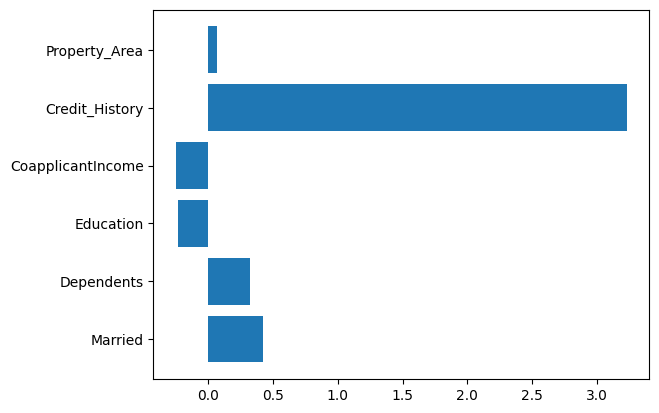

In [ ]:
feature_importance = model.coef_[0]
feature_names = x.columns
plt.barh(feature_names, feature_importance)

Final Analysis:

Based on the plotted image, the most important feature is Credit_History. It has the highest value on the y-axis, indicating it has the strongest impact on the model's predictions.